# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

### Libraries

In [1]:
import os

import pandas as pd

from feature_engineering import DataManager
from feature_engineering.features import TipHistory, ReorderedRatio, DynamicFeatureTest1, DynamicFeatureTest2, \
    OrderSize, ModeDepartment, PrevTippedProductsRatio, CustomerLifetime, PrevOrderTipped, OrderFrequency, \
    SimOrdersTipRatio, ProductTipRate, DepartmentTipRate, AisleTipRate, OrderExcessLikability, AvgSizePrevOrders, \
    MeanOrderedRate, LastTipSequence, RelDaysSinceTip, DaysSinceTip

### Data Initialization

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)
order_amount = len(data_manager.get_orders_tip())

### Feature Engineering

In [3]:
# features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'tip_history',
#             'reordered_ratio', 'order_size', 'mode_dept', 'prev_tipped_products_ratio']

# Kilian
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()

# Daniel
mode_dept = ModeDepartment()
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()
rel_days_since_tip = RelDaysSinceTip()
days_since_tip = DaysSinceTip()

# Max
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()

# Tom
order_excess_likability = OrderExcessLikability()  # TODO
avg_size_prev_orders = AvgSizePrevOrders()  # TODO

# Test
dynamic_feature_test_1 = DynamicFeatureTest1()
dynamic_feature_test_2 = DynamicFeatureTest2()

In [4]:
# Static Features
# data_manager.register_feature(tip_history)
# data_manager.register_feature(reordered_rate)
# data_manager.register_feature(order_size)
# data_manager.register_feature(customer_lifetime)
# data_manager.register_feature(prev_order_tipped)
# data_manager.register_feature(prev_tipped_products_ratio)

# data_manager.register_feature(mode_dept)
# data_manager.register_feature(order_frequency)
# data_manager.register_feature(sim_orders_tip_ratio)
# data_manager.register_feature(order_excess_likability)
# data_manager.register_feature(avg_size_prev_orders)
# data_manager.register_feature(mean_ordered_rate)
# data_manager.register_feature(last_tip_sequence)
# data_manager.register_feature(rel_days_since_tip)
# data_manager.register_feature(days_since_tip)
# 
# # Dynamic Features
# data_manager.register_feature(dynamic_feature_test_1)
# data_manager.register_feature(dynamic_feature_test_2)
# data_manager.register_feature(product_tip_rate)
# data_manager.register_feature(department_tip_rate)
# data_manager.register_feature(aisle_tip_rate)

In [5]:
# data_manager.compute_features()

In [6]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip
0,2539329,1,prior,1,2,8,NaN,0.0
1,2398795,1,prior,2,3,7,15.0,0.0
2,473747,1,prior,3,3,12,21.0,0.0
3,2254736,1,prior,4,4,7,29.0,0.0
4,431534,1,prior,5,4,15,28.0,0.0
...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0
96,1057378,12,prior,4,3,9,26.0,0.0
97,221248,12,prior,5,1,9,30.0,0.0
98,2618231,13,prior,1,6,12,NaN,0.0


In [7]:
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [8]:
# data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [9]:
# data_manager.get_orders_tip().head(100)

In [10]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [11]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(5)
# order_amount = len(order_ids)

In [12]:
# data_manager.set_subset(order_ids)

In [13]:
# data_manager.get_orders_tip().head(25)

In [14]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [15]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(4)
# order_amount = len(order_ids)
# 
# data_manager.set_subset(order_ids)
# data_manager.get_orders_tip().head(25)

In [16]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

### Analysis

In [17]:
from analysis import AnalysisKilian

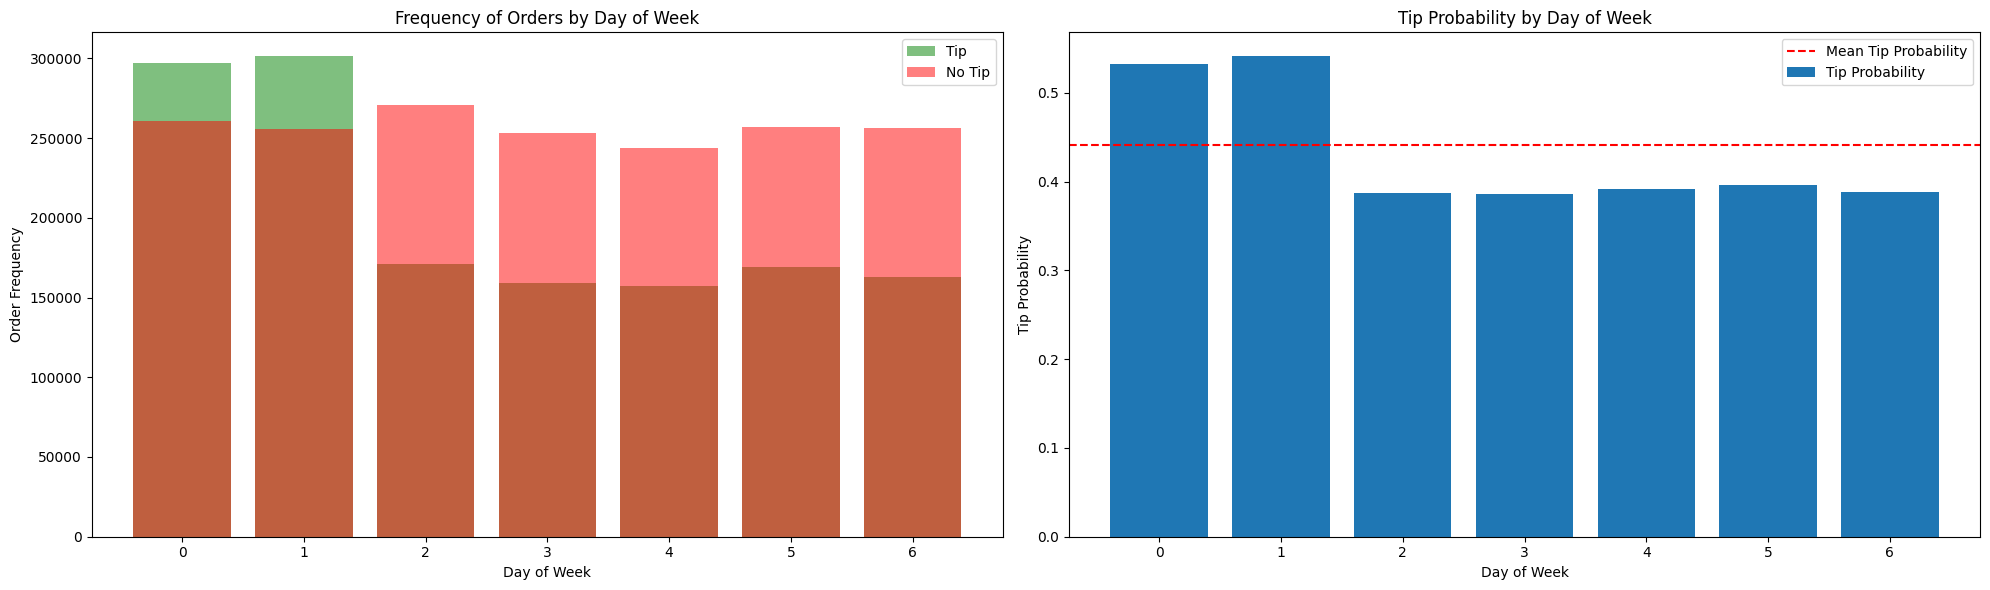

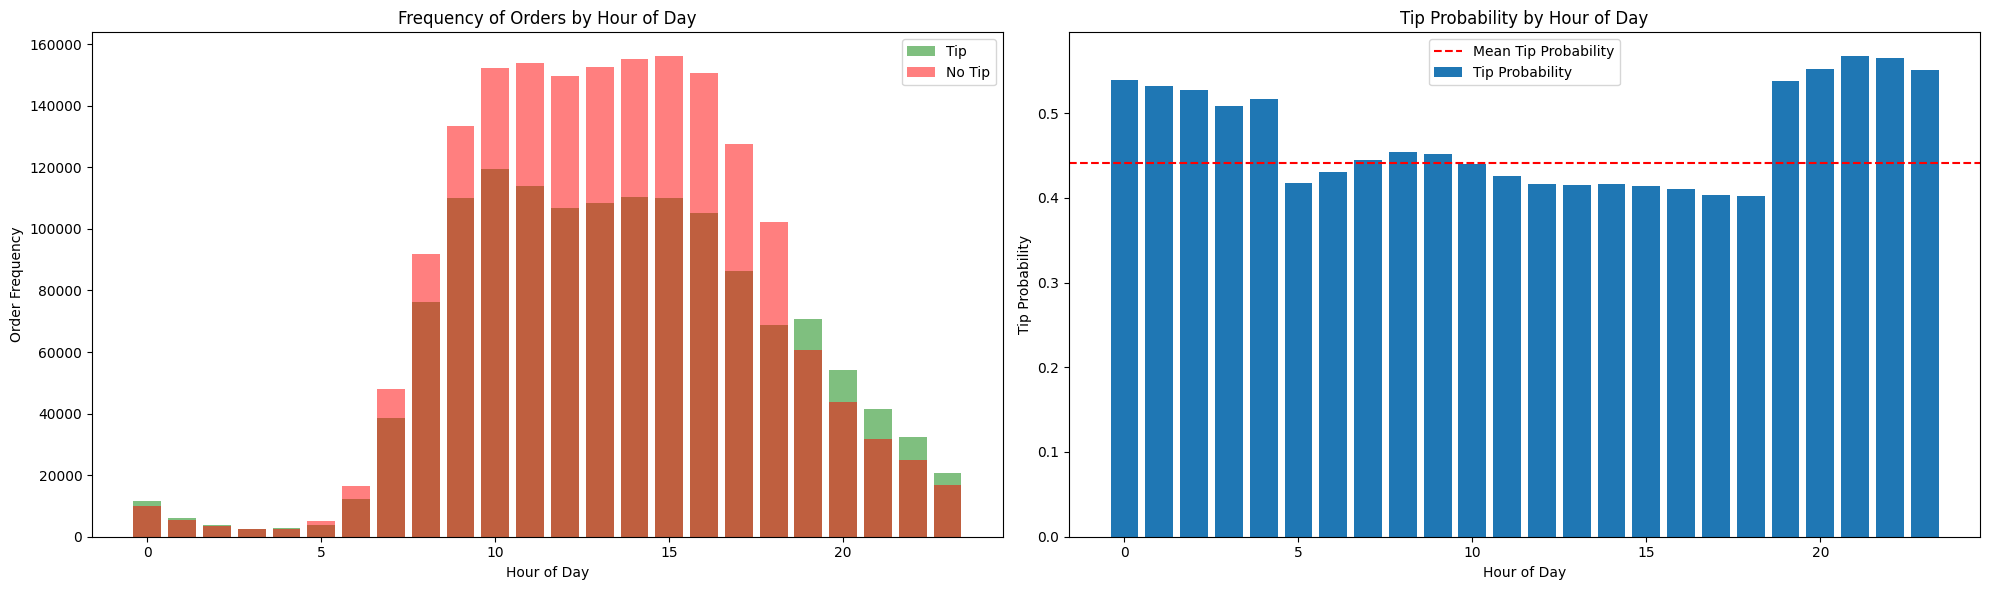

In [18]:
a = AnalysisKilian(data_manager)
# Products/Departments/Aisles
# Frequency & conditional probability tip/no_tip -> Cross-Tab
# Frequency of items with tip probability > 0.9, 0.8, 0.7, 0.6, 0.5 ... 0.1 
# Group into percentiles and average tip probability
# Plot bar chart with tip probability and mean tip probability (limit to top 10)

# Day of the Week/Hour of day with tip/no_tip -> Cross-Tab
# Frequency & conditional probability tip/no_tip -> Cross-Tab
a.execute_analysis()

In [19]:
dow_hod_tip = a.orders_tip[['order_dow', 'order_hour_of_day', 'tip']]

cross_tab_dow = pd.crosstab(index=dow_hod_tip['order_dow'], columns=dow_hod_tip['tip'], margins=True)
cross_tab_dow

tip,0.0,1.0,All
order_dow,,,
0,260999,296773,557772
1,255469,301236,556705
2,270663,171292,441955
3,253353,159047,412400
4,243855,157357,401212
5,257090,168892,425982
6,256187,162661,418848
All,1797616,1417258,3214874


In [20]:
cross_tab_dow_normalized = pd.crosstab(index=dow_hod_tip['order_dow'], columns=dow_hod_tip['tip'], margins=True,
                                       normalize='index')
cross_tab_dow_normalized

tip,0.0,1.0
order_dow,,
0,0.467931,0.532069
1,0.458895,0.541105
2,0.612422,0.387578
3,0.614338,0.385662
4,0.607796,0.392204
5,0.603523,0.396477
6,0.611647,0.388353
All,0.559156,0.440844


In [21]:

# fig = plt.figure(figsize=(10, 6))
# plt.bar(cross_tab_dow_normalized.index[:-1].astype(int), cross_tab_dow_normalized[1][:-1], label='Tip Probability')
# plt.axhline(y=cross_tab_dow_normalized[1]['All'], color='r', linestyle='--', label='Mean Tip Probability')
# plt.legend()
# 
# plt.xlabel("Day of the Week")
# plt.ylabel("Tip Probability")
# plt.title("Tip Probability by Day of the Week")
# 
# plt.show()

In [22]:
cross_tab_hod = pd.crosstab(index=dow_hod_tip['order_hour_of_day'], columns=dow_hod_tip['tip'], margins=True)
cross_tab_hod

tip,0.0,1.0,All
order_hour_of_day,,,
0,9850,11522,21372
1,5434,6162,11596
2,3346,3724,7070
3,2516,2604,5120
4,2501,2674,5175
5,5227,3745,8972
6,16382,12410,28792
7,48096,38560,86656
8,91937,76384,168321


In [23]:
cross_tab_hod_normalized = pd.crosstab(index=dow_hod_tip['order_hour_of_day'], columns=dow_hod_tip['tip'], margins=True,
                                       normalize='index')
cross_tab_hod_normalized

tip,0.0,1.0
order_hour_of_day,,
0,0.460883,0.539117
1,0.468610,0.531390
2,0.473267,0.526733
3,0.491406,0.508594
4,0.483285,0.516715
5,0.582590,0.417410
6,0.568977,0.431023
7,0.555022,0.444978
8,0.546200,0.453800


In [24]:
# fig = plt.figure(figsize=(10, 6))
# plt.bar(cross_tab_hod_normalized.index[:-1].astype(int), cross_tab_hod_normalized[1][:-1], label='Tip Probability')
# plt.axhline(y=cross_tab_hod_normalized[1]['All'], color='r', linestyle='--', label='Mean Tip Probability')
# plt.legend()
# 
# plt.xlabel("Hour of the Day")
# plt.ylabel("Tip Probability")
# plt.title("Tip Probability by Hour of the Day")
# 
# plt.show()

### Model Training & Evaluation